# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## 1. Business Objetives

The main business objective is to identify the key factors that influence the price of used cars, determining which characteristics make them more or less expensive. This understanding will enable a used car dealership to make informed strategic decisions, such as which types of vehicles to keep in stock, how to price them accurately, and which attributes to highlight in order to attract buyers.

## 2. Required Data

To achieve the business objective, it is necessary to have a considerable amount of data related to the characteristics of used vehicles. For example:

- Brand
- Model
- Year
- Color
- Condition (new, used, repaired, etc.)
- Mileage
- Fuel type (gasoline, diesel, electric, hybrid, etc.)
- Engine displacement
- Estimated fuel consumption
- Vehicle type (sedan, SUV, truck, etc.)
- Transmission (manual or automatic)
- Number of previous owners
- Accident history
- Other optional or complementary attributes

Having access to this data allows for the construction of more accurate predictive models and provides better-informed recommendations.


### 3. Data Mining

Considering the characteristics of the project, it is important to use data mining techniques focused on collecting and processing large volumes of public information on used cars. This may involve extracting data from car sales websites (such as Chileautos, Facebook Marketplace, or Mercado Libre for the Chilean market), available APIs, or social networks. The collected data will be cleaned, transformed, and prepared for further analysis.

### 4. Project Plan

The project will be developed following the CRISP-DM methodology:

1. Business Understanding: Define the client’s objectives and needs.
2. Data Understanding: Explore and assess the quality of the collected data.
3. Data Preparation: Clean, transform, and structure the data for modeling.
4. Modeling: Apply machine learning techniques to predict used car prices.
5. Evaluation: Validate the model and ensure it meets the defined objectives.
6. Deployment: Deliver conclusions and practical recommendations to the client.

This plan ensures an organized approach aligned with the commercial goals of the dealership.

###

# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

## Exploring data

### 1. Libraries and dataset preview

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/vehicles.csv')
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


### 2. General information and structure

There are fields with no value for the analysis, such as:
- id: identifier, not a characteristic of a vehicle
- region: location, not a characteristic of a vehicle
- state: location, not a characteristic of a vehicle
- vin: identifier, not a characteristic of a vehicle
- model: It has too many unique categorical values to be effectively analyzed (variability) and it is not a feature of a vehicle
- manufacturer: It has too many unique categorical values to be effectively analyzed (variability) and it is not a feature of a vehicle

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

##### Descriptive statistics table

In [3]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### 3. Unique values per column

##### Unique values per column - like count

In [4]:
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

##### Unique values per column - without numerical types, model, region, state and VIN 

In [5]:
excluded_cols = ['model', 'region', 'state', 'VIN']

# Select columns without excluded columns
categorical_cols = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if col not in excluded_cols
]

# Making dataframes for each non excluded column
for col in categorical_cols:
    vc_df = df[col].value_counts(dropna=False).reset_index()
    vc_df.columns = [col, 'count']
    display(vc_df)

,manufacturer,count
0,ford,70985
1,chevrolet,55064
2,toyota,34202
3,honda,21269
4,nissan,19067
5,jeep,19014
6,ram,18342
7,NaN,17646
8,gmc,16785
9,bmw,14699


,condition,count
0,NaN,174104
1,good,121456
2,excellent,101467
3,like new,21178
4,fair,6769
5,new,1305
6,salvage,601


,cylinders,count
0,NaN,177678
1,6 cylinders,94169
2,4 cylinders,77642
3,8 cylinders,72062
4,5 cylinders,1712
5,10 cylinders,1455
6,other,1298
7,3 cylinders,655
8,12 cylinders,209


,fuel,count
0,gas,356209
1,other,30728
2,diesel,30062
3,hybrid,5170
4,NaN,3013
5,electric,1698


,title_status,count
0,clean,405117
1,NaN,8242
2,rebuilt,7219
3,salvage,3868
4,lien,1422
5,missing,814
6,parts only,198


,transmission,count
0,automatic,336524
1,other,62682
2,manual,25118
3,NaN,2556


,drive,count
0,4wd,131904
1,NaN,130567
2,fwd,105517
3,rwd,58892


,size,count
0,NaN,306361
1,full-size,63465
2,mid-size,34476
3,compact,19384
4,sub-compact,3194


,type,count
0,NaN,92858
1,sedan,87056
2,SUV,77284
3,pickup,43510
4,truck,35279
5,other,22110
6,coupe,19204
7,hatchback,16598
8,wagon,10751
9,van,8548


,paint_color,count
0,NaN,130203
1,white,79285
2,black,62861
3,silver,42970
4,blue,31223
5,red,30473
6,grey,24416
7,green,7343
8,custom,6700
9,brown,6593


###

##### Checking for duplicates

In [6]:
df.duplicated().sum()

0

### 4. Check for missing values: count and percentage per column

Several fields with null records are observed. Size has 72% of missing values, meanwhile condition and cylinders has 42%.
Drive, color and type has 20 to 30% of null records.


##### Sum missing values per column

In [7]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

##### Calculate % of missing values per column

In [8]:
miss_perc = (df.isnull().sum() / len(df)) * 100 
miss_perc

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

##### Ploting missing values: only 

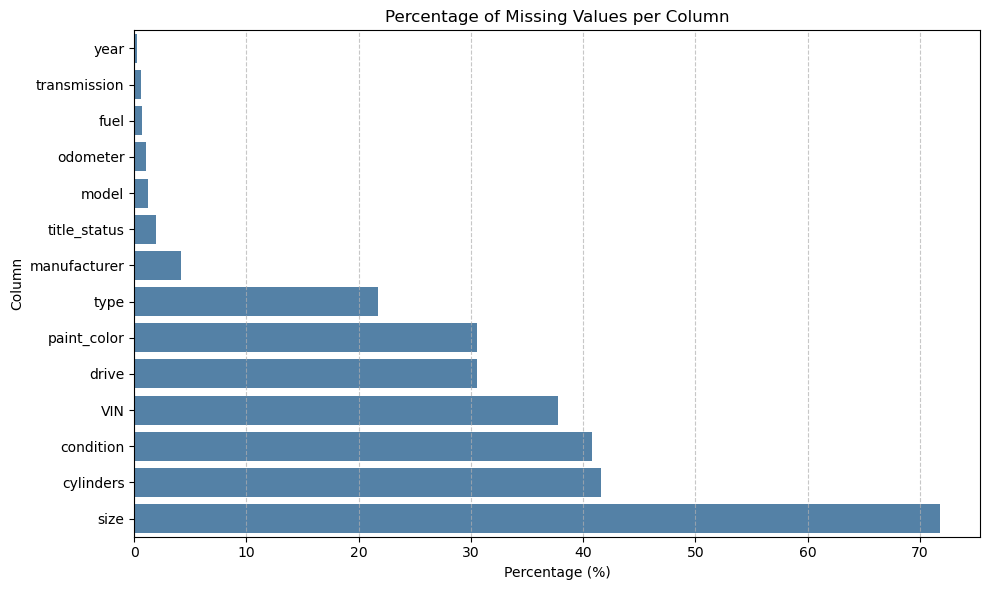

In [9]:
# Filters only columns with missing values and plot it
miss_perc_filtered = miss_perc[miss_perc > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=miss_perc_filtered, y=miss_perc_filtered.index, color='steelblue')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Percentage (%)')
plt.ylabel('Column')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

######

### 5. Min, max y outliers of numerical data
Minimum and maximum values in the numerical fields show extreme and illogical entries. For example: 10 million kilometers on the odometer, prices with a maximum of $3,736,928,711, or vehicles from the year 1900.
The boxplot graphs reveal outlier values.

##### Table of min & max values

In [10]:
df_num = df.select_dtypes(include='number')
df_min_max = df_num.agg(['min', 'max']).transpose()
df_min_max

,min,max
id,7.207408e+09,7.317101e+09
price,0.000000e+00,3.736929e+09
year,1.900000e+03,2.022000e+03
odometer,0.000000e+00,1.000000e+07


#####  Plots of min & max values

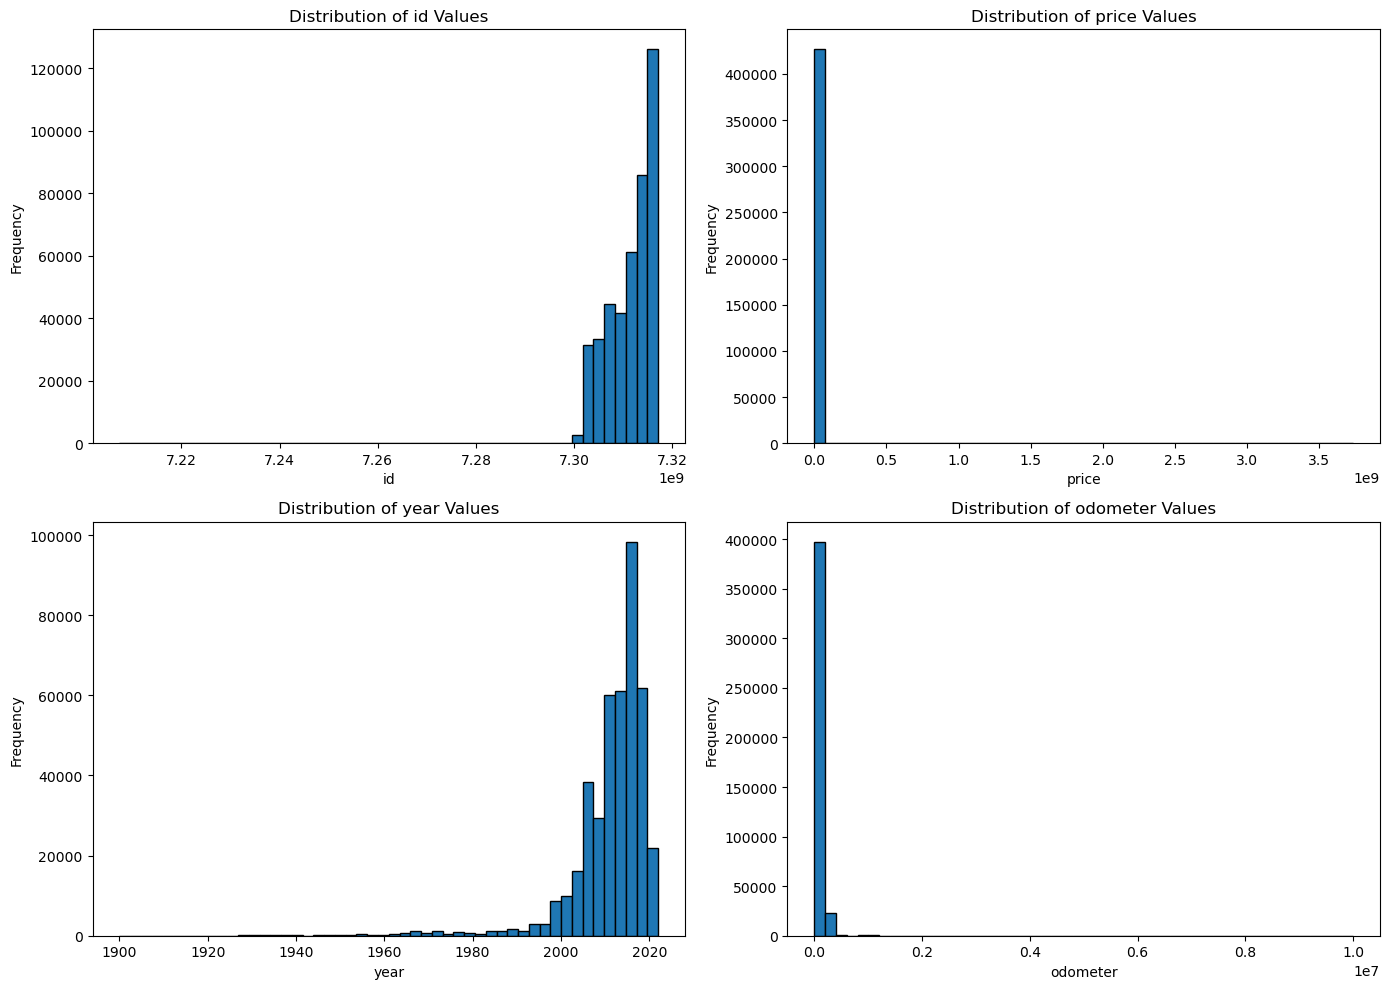

In [11]:
# Create a 2x2 grid of plots
df_num_columns = df_num.columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

axes = axes.flatten()
for i, col in enumerate(df_num_columns):
    axes[i].hist(df[col].dropna(), bins=50, edgecolor='black')
    axes[i].set_title(f'Distribution of {col} Values')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Boxplot to detect outliers in numerical data (excluding id)

Id column is only an identifier, so it was excluded from this graphical analysis.
The plots show:
- Prices: Concentration of values between 0 and 60,000. Outliers appear from $200,000 upwards.
- Years: Concentration of values between 2000 and 2020. Outliers appear before 1960.
- Odometer: Concentration of values at lower ranges.

###### Prices
The first plot shows outlier values starting from 100,000. The second plot was limited to display values below 100,000. The second plot includes only values between 1,000 and 100,000 for better visualization and set a logical limit for the value of a used car.

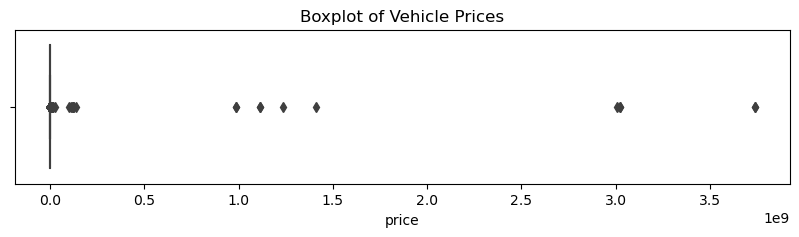

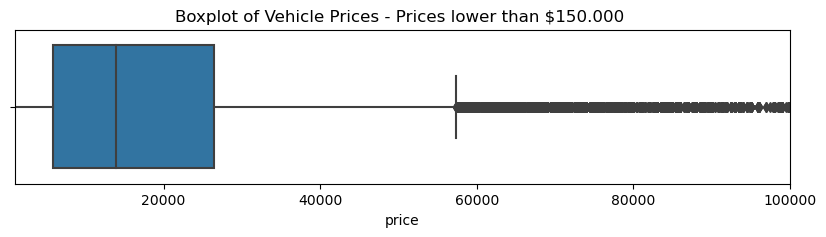

In [12]:
# First price Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='price')
plt.title('Boxplot of Vehicle Prices')
plt.show()

# Second price Boxplot - lower than $200.000
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='price')
plt.title('Boxplot of Vehicle Prices - Prices lower than $150.000 ')
plt.xlim(1000, 100000) 
plt.show()

###### Year
The first graph shows outlier values starting from 1950. The second graph was limited to display only values above that year.

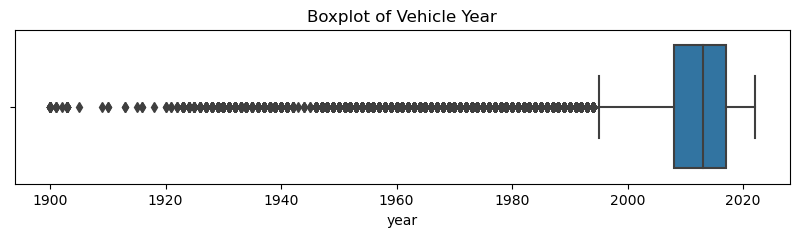

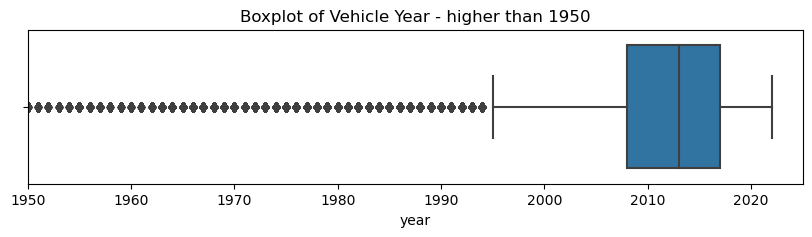

In [13]:
# First year Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='year')
plt.title('Boxplot of Vehicle Year')
plt.show()

# Second year Boxplot - higher than 1950
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='year')
plt.title('Boxplot of Vehicle Year - higher than 1950')
plt.xlim(1950, 2025)
plt.show()



###### Odometer
The first graph shows outlier values above 500,000. The second graph was limited to display only values below that number.

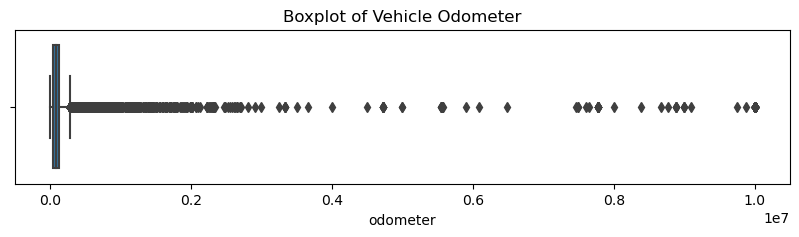

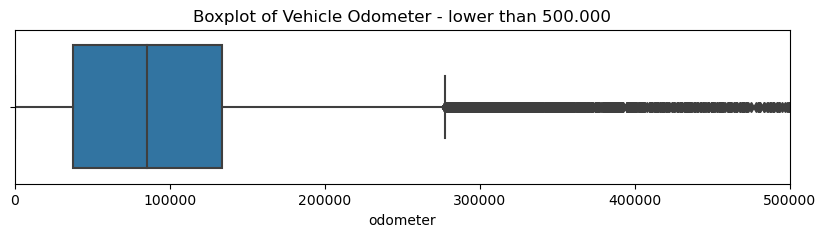

In [14]:
# First odometer Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='odometer')
plt.title('Boxplot of Vehicle Odometer')
plt.show()

# Second odometer Boxplot - higher than 1950
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='odometer')
plt.title('Boxplot of Vehicle Odometer - lower than 500.000')
plt.xlim(0, 500000)
plt.show()

#####

### 6. Looking for Correlations (heatmap)

In the first plot, certain correlation patterns are observed that are presumed to be inaccurate due to the quality of the data (which has not yet been cleaned). In the second plot, a preliminary data cleaning is performed to identify more realistic correlations between variables, leading to the following conclusions:

- price & year: Moderate positive correlation. The newer the vehicle (higher year), the higher the price. This is consistent.. 
- price & year: Moderate negative correlation. The higher the mileage, the lower the price. This is consistent.
- year & odometer: Strong negative correlation. Newer cars tend to have lower mileage. This is consistent.

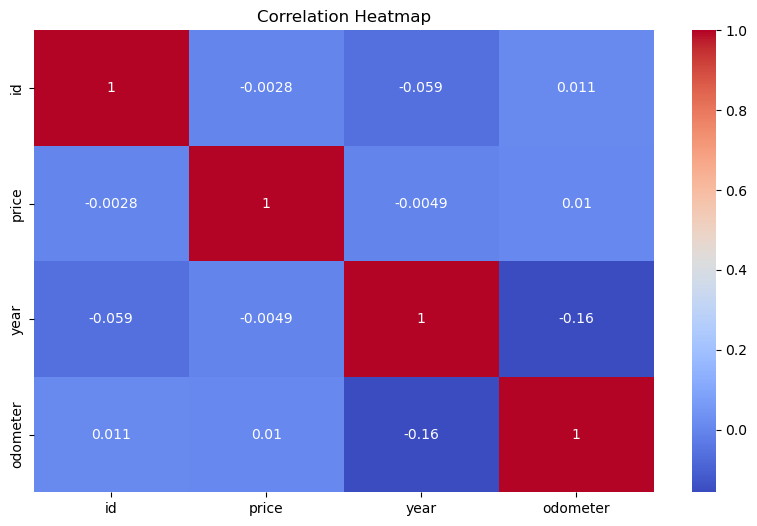

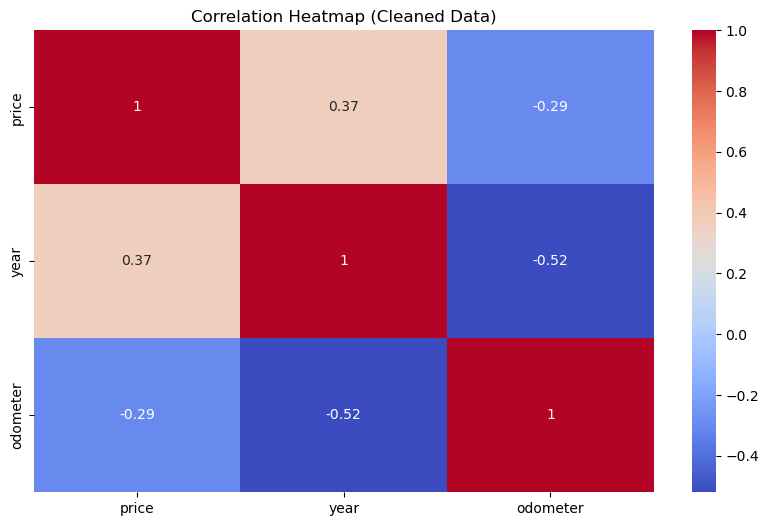

In [15]:
# First correlation heatmap plot
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Second correlation heatmap plot - Cleaner Data

# A. Copy of df
df_clean = df.copy()

# B. Drop 'id'
if 'id' in df_clean.columns:
    df_clean = df_clean.drop(columns='id')

# C. Apply logical filters to remove clearly invalid values
df_clean = df_clean[
                    (df_clean['price'] < 200000) &       # Keep prices under 200,000
                    (df_clean['year'] > 1950) &          # Keep vehicles newer than 1950
                    (df_clean['odometer'] < 500000)      # Keep odometers under 500,000 km
                    ]

# D. Drop missing values
df_clean = df_clean.dropna()

# E. Remove outliers using IQR method
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(df_clean)

# F. Ploting Cleaned-Data Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df_clean.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Cleaned Data)')
plt.show()

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Data Cleaning

Based on the features explored in the previous section, the final data preparation is carried out prior to modeling.

### 1. Droping  columns
Drop columns that are not features of the vehicle or not useful for modeling. These include identifiers, location-based variables, and those with too many categorical values (variability), like 'model' or 'manufacturer'.

In [16]:
df_model = df.copy()

cols_to_drop = ['id', 'region', 'state', 'VIN', 'model', 'size', 'manufacturer', 'paint_color', 'cylinders', 'drive']
df_model = df_model.drop(columns= cols_to_drop)

### 2. Remove extreme and illogical values 

Remove records from dataframe with these conditions: 
- Remove records with prices below $'1,000 or above '$'100,000 are likely errors or outliers (like the $3.7B max found in Exploration Data Analysis)
- Remove odometer outliers values above 500,000 km are extremely rare for used cars
- Remove vehicle years before 1980, implausible because outdated or invalid. Most valid listings are concentrated between 2000 and 2022, as seen in the histograms


In [17]:
df_model = df_model[(df_model['price'] >= 2000) & (df_model['price'] <= 100000)]
df_model = df_model[df_model['odometer'] <= 500000]
df_model = df_model[df_model['year'] >= 1960]


### 3. Droping rows missing key

These features are necessary for modeling, and nulls here could degrade model performance. 
Although the variable 'type' had a significant percentage of missing values, it will be retained as it is an important feature to analyze.



In [18]:
#essential_cols = ['year', 'condition', 'fuel', 'odometer', 'transmission', 'type']
essential_cols = ['year', 'price','odometer']
df_model = df_model.dropna(subset=essential_cols)

### 4. Converting categorical variables to numeric
Using one-hot encoding. Required for scikit-learn models that do not support string inputs.

In [20]:
df_model = pd.get_dummies(df_model)

### 5. Validating data cleaning

As seen in the scatter plots and the correlation matrix, where logical values and curve shapes consistent with reality are observed, the data cleaning process proved effective. Additionally, there are no longer any fields with null values that could negatively impact the modeling phase.

In [21]:
print(df_model.isnull().sum())

price                      0
year                       0
odometer                   0
condition_excellent        0
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
fuel_diesel                0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_automatic     0
transmission_manual        0
transmission_other         0
type_SUV                   0
type_bus                   0
type_convertible           0
type_coupe                 0
type_hatchback             0
type_mini-van              0
type_offroad               0
type_other                 0
type_pickup                0
type_sedan                 0
type_truck                 0
type_van      

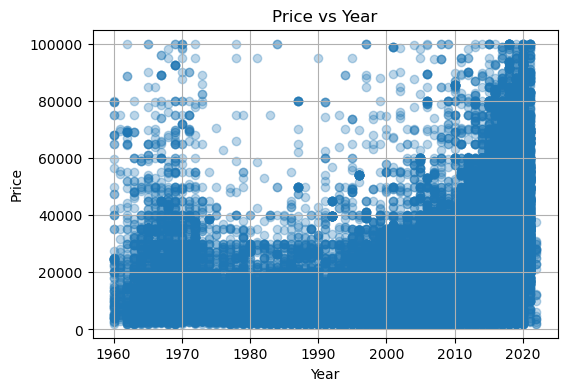

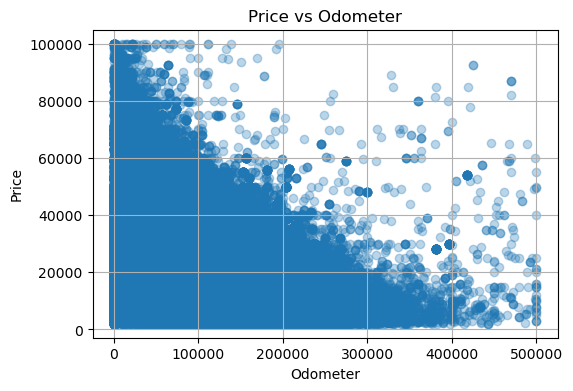

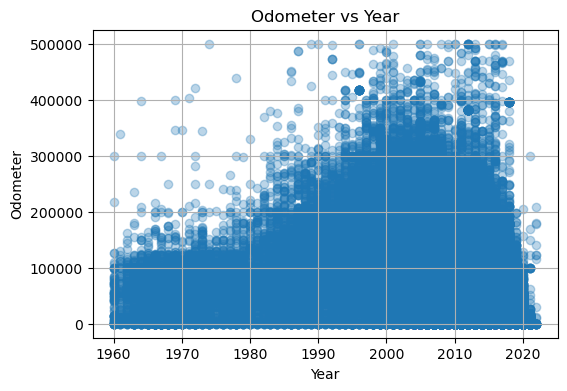

In [22]:
# 2D scatter plots with cleaned dataset
plt.figure(figsize=(6, 4))
plt.scatter(df_model['year'], df_model['price'], alpha=0.3)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df_model['odometer'], df_model['price'], alpha=0.3)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df_model['year'], df_model['odometer'], alpha=0.3)
plt.title('Odometer vs Year')
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.grid(True)
plt.show()


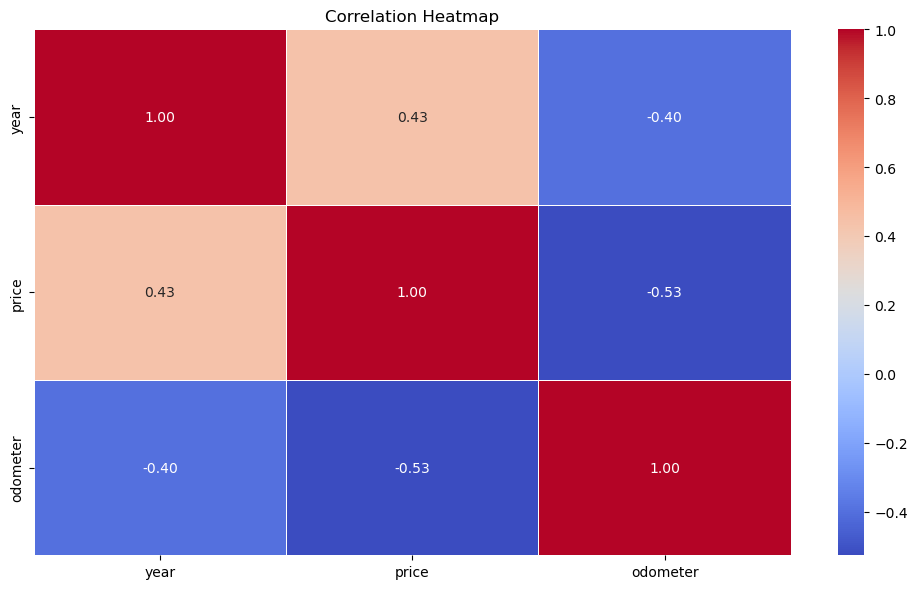

In [23]:
corr = df_model[['year', 'price', 'odometer']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Previews steps 

### 1. Separate predictors and target variable

Price is the variable we want to predict, while the rest are predictors (engineered or transformed features).
This aligns with the business goal of understanding what features drive used car prices.

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance

X = df_model.drop(columns=['price'])
#y = np.log1p(df_model['price'])
y = df_model[['price']]


### 3. Split the dataset

Spliting into training and testing sets (80/20 split) allows to evaluate model generalization on unseen data, crucial to assess real-world predictive power.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Scale the features

Estandardizing ensures that all numeric features are on the same scale (mean=0, std=1), which is essential for distance-based models like KNN and also improves optimization stability in regression models.

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifying correct standardization (mean ~ 0; std ~ 1)
print(X_train_scaled.mean())
print(X_train_scaled.std())

1.6053373040347088e-16
0.9999999999999999


## Using Regressors

For the analysis, three types of regressions were selected in order to compare them and evaluate which one delivers the best predictive performance based on RMSE.

### 1. Linear Regression model

This model serves as a baseline. It assumes a linear relationship between the predictors and the target price, which helps to interpret feature influence but may underperform if nonlinear patterns are present in the data.

#### Predict and evaluate on the test set
RMSE quantifies the average prediction error in the original price scale, making it easy to interpret.

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#Predict and evaluate RMSE on the test set
lr_preds = lr_model.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

print(f"linear Regression RMSE: {lr_rmse: .4f}")

lr_RMSE:  9398.3752


#### Ploting Lr
As shown in the chart, the most important features are odometer, year, and diesel fuel — the latter being a variable whose relationship with price had not been intuitively observed. Additionally, other features such as type_truck and type_pickup also show considerable importance, ranking among the top five features.

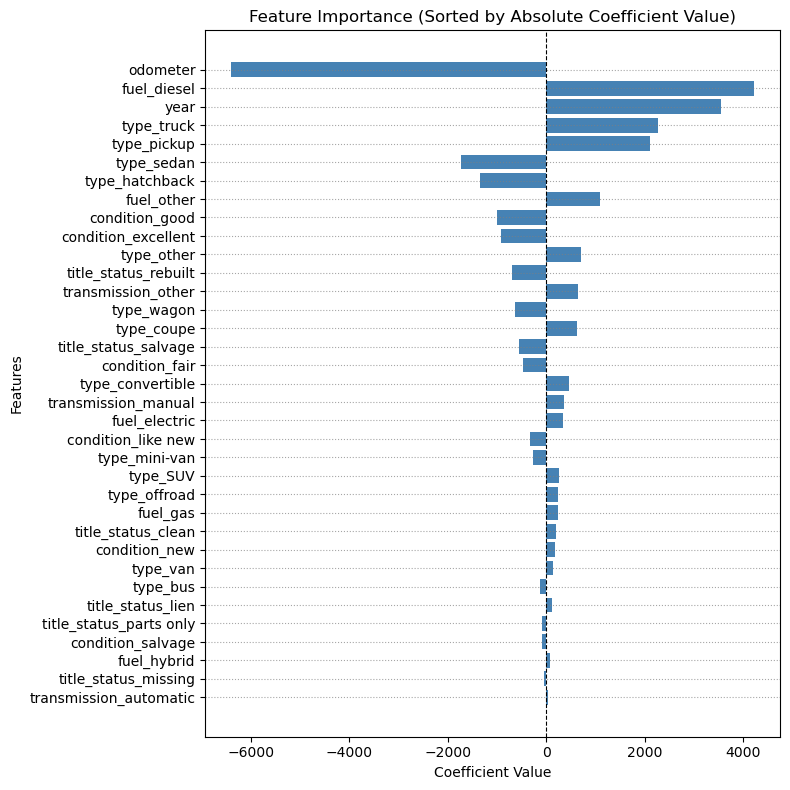

In [53]:
# Plot feature importance (coefficients)
features_names = X.columns.tolist()
lr_coefs = lr_model.coef_.flatten()

# Sort the feature importances by absolute value
sorted_indices = np.argsort(np.abs(lr_coefs))[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefs = lr_coefs[sorted_indices]


plt.figure(figsize=(8, 8))
plt.barh(sorted_features, sorted_coefs, color='steelblue')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.7)
plt.title("Feature Importance (Sorted by Absolute Coefficient Value)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Mostrar la más importante arriba
plt.tight_layout()
plt.show()

### 2. KNN Regressor model

Define hyperparameters for KNN model, who relies on the proximity of data points. Choosing the optimal 'k' is key to balancing bias and variance.

#### Predict and evaluate on the test set
Applying GridSearchCV to find the best number of neighbors with 5-fold cross-validation. This ensures robustness in model selection by averaging performance across multiple train/test splits.

In [32]:
# KNN
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsRegressor(), knn_params, cv = 5, scoring='neg_mean_squared_error')
knn_model.fit(X_train, y_train)

# Predict and calculate RMSE on the test set
knn_preds = knn_model.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_preds))
knn_best_k = knn_model.best_params_['n_neighbors']

print(f"knn best k: {knn_best_k: .4f}")
print(f"knn RMSE : {knn_rmse: .4f}")

knn best k:  3.0000
knn RMSE :  8194.9896


#### Ploting KNN Feature Importance
Although the KNN model does not have coefficients that allow for identifying feature importance—since it predicts based on the proximity of data points in feature space—it is possible to simulate this by randomly permuting each variable and measuring the model’s error after the change. This process is known as “permutation importance.”

When visualized, it becomes clear that the model identified only odometer and year as important variables.

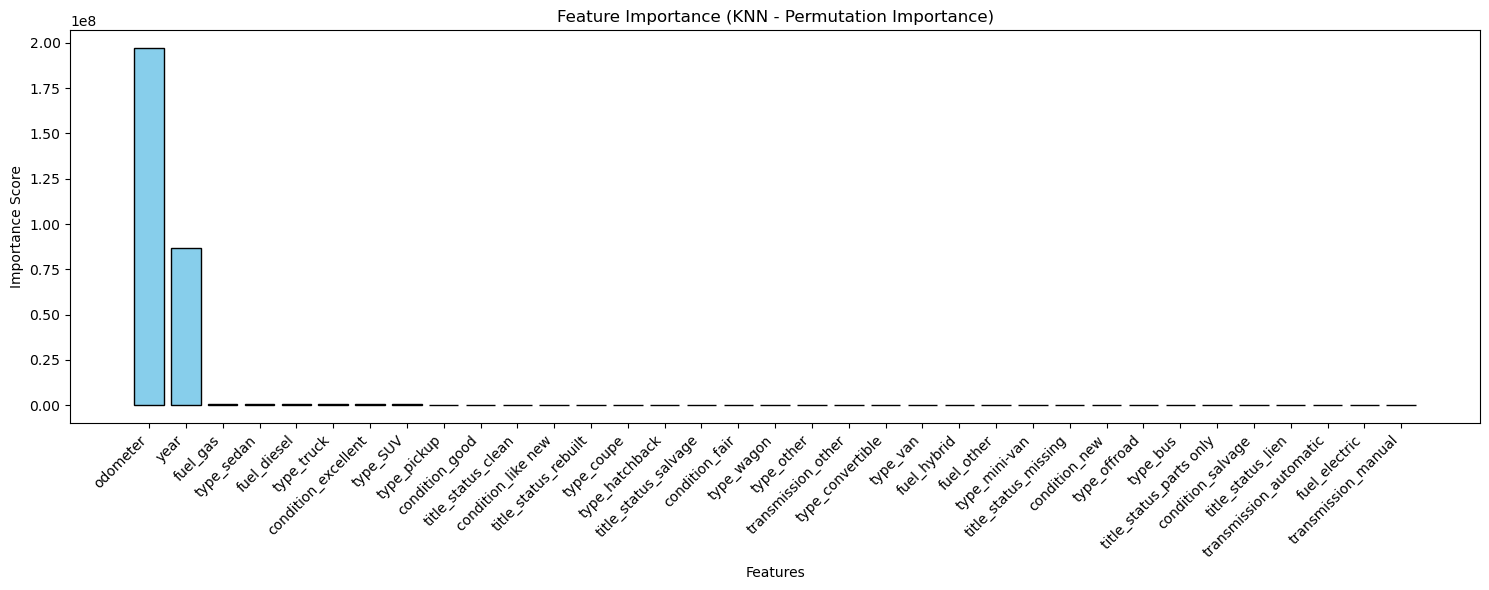

In [33]:
#Calculating pertmutation importance
knn_result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

importances = knn_result.importances_mean
indices = np.argsort(importances)[::-1]
feature_names = X.columns

#Ploting
plt.figure(figsize=(15, 6))
plt.bar(np.array(feature_names)[indices], importances[indices], color='skyblue', edgecolor='black')
plt.title("Feature Importance (KNN - Permutation Importance)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. Decision Tree Regressor model

A hyperparameter grid was defined to train a Decision Tree Regressor model, where the data was split based on feature thresholds. The grid included a max_deph of 5, 10, 15; and a min_samples_split de 2, 5, 10. Since there is a risk of overfitting, the model will be evaluated for this case.

#### Predict and evaluate on the test set
I used GridSearchCV with 5-fold cross-validation to select the best tree configuration. This model is flexible to nonlinear relationships and interactions, which we expect based on the data exploring fase. 

In [41]:
# Decision Tree model
tree_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5, scoring='neg_mean_squared_error')
tree_model.fit(X_train, y_train)

# Predict and evaluate RMSE
tree_preds = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))
tree_best_params = tree_model.best_params_

tree_rmse

7323.434869631622

#### Ploting Decision Tree 
As observed in the feature importance chart from the linear regression model, the variables year, odometer, diesel fuel, and type_pickup appear again. However, this time the variable fuel_gas also ranks within the top 5.

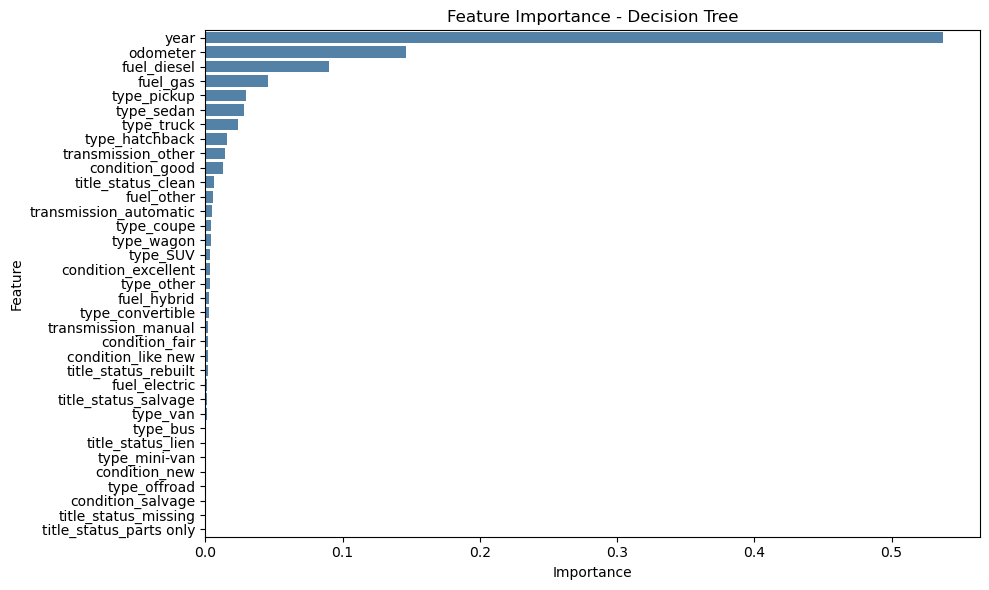

In [60]:
# Decision Tree - Feature Importances
tree_feature_importance = tree_model.best_estimator_.feature_importances_ #calculation feature importances

#Sorting by importance
sorted_indices = np.argsort(tree_feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = tree_feature_importance[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tree_importance_df, color='steelblue')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Comparing Models

To conclude which model best predicted the relationships between the features and the price, RMSE values should be compared. A lower RMSE indicates less prediction error, with the Decision Tree model providing the best fit without overfitting.

Three regression models were trained and evaluated using Root Mean Squared Error (RMSE) as the performance metric. The results are summarized below:

In [84]:
results_df = pd.DataFrame({
                        'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor'],
                        'RMSE': [lr_rmse, knn_rmse, tree_rmse]
                        })
results_df['RMSE'] = results_df['RMSE'].astype(int)

results_df.style.hide(axis=0)

Model,RMSE
Linear Regression,9398
KNN Regressor,8194
Decision Tree Regressor,7323


Lower RMSE values indicate a smaller average prediction error, with the Decision Tree Regressor delivering the best performance among the three.

## Technical Evaluation

### 1. Model Accuracy and Robustness
The Decision Tree Regressor achieved the lowest RMSE on the test set (7323), indicating superior predictive performance. To verify model robustness and assess potential overfitting, RMSE was also calculated on the training data:

In [85]:
# Calculating Decision Tree training error
train_preds = tree_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {tree_rmse:.2f}")

Train RMSE: 6775.55
Test RMSE : 7323.43


The relative difference was <10%, suggesting that the model generalizes well and is not overfitting.

### 2. Model Interpretability
Each model provided insights into feature importance:

#### a. Linear Regression:
Identified odometer, fuel_diesel, year and type_truck as key drivers.

#### b. KNN Regressor:
Which lacks inherent interpretability, was analyzed using permutation importance. It highlighted odometer and year as dominant variables.

#### c. Decision Tree Regressor:
Using native feature importances, confirmed the significance of year, odometer and fuel_diesel, and also highlighted fuel_gas and type_pickup as important.

## Business Interpretation
The models consistently surfaced variables with clear business relevance:

- Year: Newer vehicles tend to have higher resale value
- Odometer: Higher mileage negatively impacts price, as expected
- Fuel_diesel and fuel_gas: These fuel types influence price due to perceived efficiency or commercial value
- Vehicle Type: Categories such as truck type and pickup type were consistently important, which may reflect consumer preferences for utility and commercial use, and the perception that these larger vehicle types are more reliable and robust

From a business standpoint, these findings are both intuitive and actionable. The Decision Tree model, in particular, offers a balance between predictive performance and interpretability, making it a compelling choice for stakeholders seeking insights and reliable predictions.


## Conclusion

The Decision Tree Regressor was selected as the most suitable model due to its strong performance (lowest RMSE), interpretability, and robustness against overfitting. It provides valuable business insights into which features most influence used car prices and serves as a reliable tool for pricing strategy or decision support.

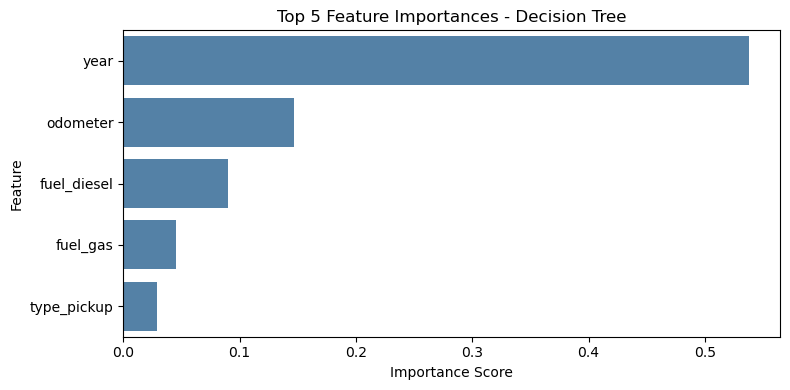

In [86]:
#Plotting the Top 5 Most Important Features from the Decision Tree
sorted_indices = np.argsort(tree_feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = tree_feature_importance[sorted_indices]

plt.figure(figsize=(8, 4))
sns.barplot(x=sorted_importances[:5], y=sorted_features[:5], color='steelblue')
plt.title('Top 5 Feature Importances - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

This visualization reinforces the insight that variables such as **year, odometer and fuel types are key drivers of vehicle price**.

# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Primary Findings

After evaluating multiple regression models using a dataset of over 400,000 vehicle listings, we identified the Decision Tree Regressor as the most effective predictive tool based on RMSE and interpretability. The results allow us to highlight the most influential factors impacting used car prices.

In [94]:
results_df2 = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor'],
    'Best Parameters': [
                        '-',
                        f'n_neighbors={knn_best_k}',
                        f"max_depth={tree_best_params['max_depth']}, min_samples_split={tree_best_params['min_samples_split']}"
                        ],
    'RMSE': [lr_rmse, knn_rmse, tree_rmse]
})



results_df2['RMSE'] = results_df2['RMSE'].astype(int)

results_df2.style.hide(axis=0)

Model,Best Parameters,RMSE
Linear Regression,-,9398
KNN Regressor,n_neighbors=3,8194
Decision Tree Regressor,"max_depth=15, min_samples_split=10",7323


**Conclusion:** The Decision Tree Regressor provides the best balance between accuracy and explainability, making it ideal for operational deployment.

## Insights for Inventory Optimization

The following features were consistently found to have the greatest influence on vehicle pricing across all models:

- **Year:** Newer cars correlate strongly with higher prices.

- **Odometer:** Lower mileage translates to greater value.

- **Fuel Type:** Diesel vehicles retain value better than others.

- **Vehicle Type:** Trucks and pickups are valued higher than sedans or hatchbacks.

These findings are visualized in the feature importance plots included earlier in the notebook, particularly in the Decision Tree and Linear Regression sections.

## Business Recommendations
To support inventory and pricing strategies, I suggest the following actionable steps for used car dealers:

### 1. **Procurement Priorities**
Focus on acquiring newer, low-mileage, diesel-powered trucks and pickups.

### 2. **Data-Driven Pricing**
Leverage the Decision Tree model to standardize price estimation based on key vehicle features.

### 3. **Sales Optimization**
Segment and market inventory listings using top predictive features — e.g., "2019 Diesel Pickup – Low Mileage".